<a href="https://colab.research.google.com/github/HarinduR/Bank_Marketing_Using_Machine_Learning/blob/master/Build_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network build

## Build Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

### Import preprocessed dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/MLCW/preprocessed.csv")

In [4]:
data.duplicated().sum()

107

In [5]:
data = data.drop_duplicates()

In [6]:
print(data['y'].value_counts())

y
no     34423
yes     4577
Name: count, dtype: int64


In [7]:
data.shape

(39000, 47)

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39000 entries, 0 to 39106
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            39000 non-null  float64
 1   campaign                       39000 non-null  int64  
 2   pdays                          39000 non-null  int64  
 3   previous                       39000 non-null  int64  
 4   cons.price.idx                 39000 non-null  float64
 5   cons.conf.idx                  39000 non-null  float64
 6   y                              39000 non-null  object 
 7   PC1                            39000 non-null  float64
 8   PC2                            39000 non-null  float64
 9   education_basic.6y             39000 non-null  bool   
 10  education_basic.9y             39000 non-null  bool   
 11  education_high.school          39000 non-null  bool   
 12  education_illiterate           39000 non-null  bool

### Split dataset

In [9]:
X = data.drop('y', axis=1)
y = data['y']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size (X_train):", X_train.shape)
print("Test set size (X_test):", X_test.shape)

Training set size (X_train): (31200, 46)
Test set size (X_test): (7800, 46)


In [11]:
train_dist_balanced = y_train.value_counts(normalize=True).sort_index()
test_dist_balanced = y_test.value_counts(normalize=True).sort_index()

distribution_dataframe = pd.DataFrame({
    'Training Set': train_dist_balanced,
    'Test Set': test_dist_balanced
})

print("Target Distribution:")
print(distribution_dataframe)

Target Distribution:
     Training Set  Test Set
y                          
no       0.882628  0.882692
yes      0.117372  0.117308


In [12]:
print("Training Set Target Distribution:")
print(y_train.value_counts())

print("\nTest Set Target Distribution:")
print(y_test.value_counts())

Training Set Target Distribution:
y
no     27538
yes     3662
Name: count, dtype: int64

Test Set Target Distribution:
y
no     6885
yes     915
Name: count, dtype: int64


In [13]:
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Missing values in X_train: 0
Missing values in X_test: 0

X_train shape: (31200, 46)
X_test shape: (7800, 46)


### Apply SMOTE

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [15]:
print("Before SMOTE:", Counter(y_train))

Before SMOTE: Counter({'no': 27538, 'yes': 3662})


In [16]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [17]:
print("After SMOTE:", Counter(y_train_smote))

After SMOTE: Counter({'no': 27538, 'yes': 27538})


<ipython-input-18-76f289daddde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='viridis')


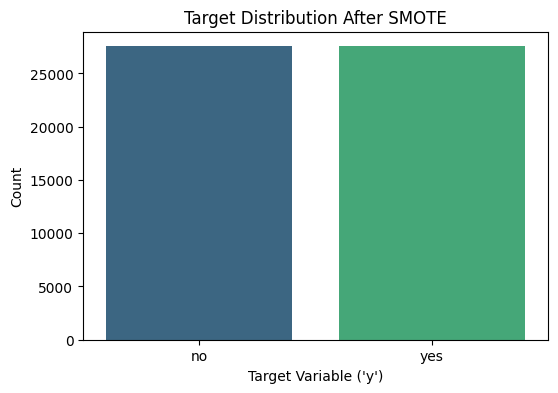

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote, palette='viridis')
plt.title("Target Distribution After SMOTE")
plt.xlabel("Target Variable ('y')")
plt.ylabel("Count")
plt.show()

In [19]:
data.duplicated().sum()

0

### Build ANN

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.layers import Dense, Dropout

In [78]:
y_train_encoded = y_train_smote.map({'yes': 1, 'no': 0}).values
y_test_encoded = y_test.map({'yes': 1, 'no': 0}).values

print("Encoded y_train values :", y_train_encoded[:5])
print("Encoded y_test values :", y_test_encoded[:5])

Encoded y_train values : [0 0 0 0 0]
Encoded y_test values : [0 0 0 0 0]


In [79]:
model = Sequential()

In [80]:
model.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [83]:
history = model.fit(
    X_train_smote, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=100, batch_size=32, verbose=1,
)

Epoch 1/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6367 - loss: 1.2428 - val_accuracy: 0.3623 - val_loss: 1.0893
Epoch 2/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7491 - loss: 0.5638 - val_accuracy: 0.7691 - val_loss: 0.5300
Epoch 3/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7881 - loss: 0.4823 - val_accuracy: 0.8786 - val_loss: 0.3418
Epoch 4/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8012 - loss: 0.4593 - val_accuracy: 0.6904 - val_loss: 0.6448
Epoch 5/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7994 - loss: 0.4753 - val_accuracy: 0.7582 - val_loss: 0.5340
Epoch 6/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8065 - loss: 0.4474 - val_accuracy: 0.8809 - val_loss: 0.3458
Epoch 7/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8131 - loss: 0.4342 - val_accuracy: 0.7683 - val_loss: 0.5084
Epoch 8/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8201 - loss: 0

In [84]:
y_pred_train = (model.predict(X_train_smote) > 0.5).astype("int32")

training_accuracy = accuracy_score(y_train_encoded, y_pred_train)
print(f"\nTraining Accuracy: {training_accuracy}")

1722/1722 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Training Accuracy: 0.8753177427554651


In [85]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy: {test_accuracy}")


Test Accuracy: 0.8715384602546692


In [86]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [87]:
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8715384615384615
Precision: 0.4532760472610097
Recall: 0.46120218579234973
F1 Score: 0.457204767063922
ROC AUC Score: 0.6936366775003869


In [88]:
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6885
           1       0.45      0.46      0.46       915

    accuracy                           0.87      7800
   macro avg       0.69      0.69      0.69      7800
weighted avg       0.87      0.87      0.87      7800



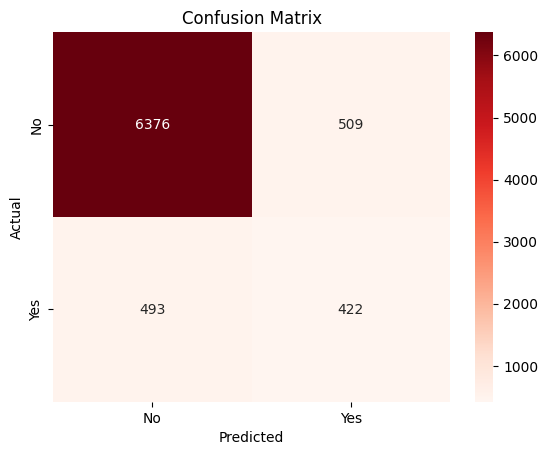

In [89]:
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

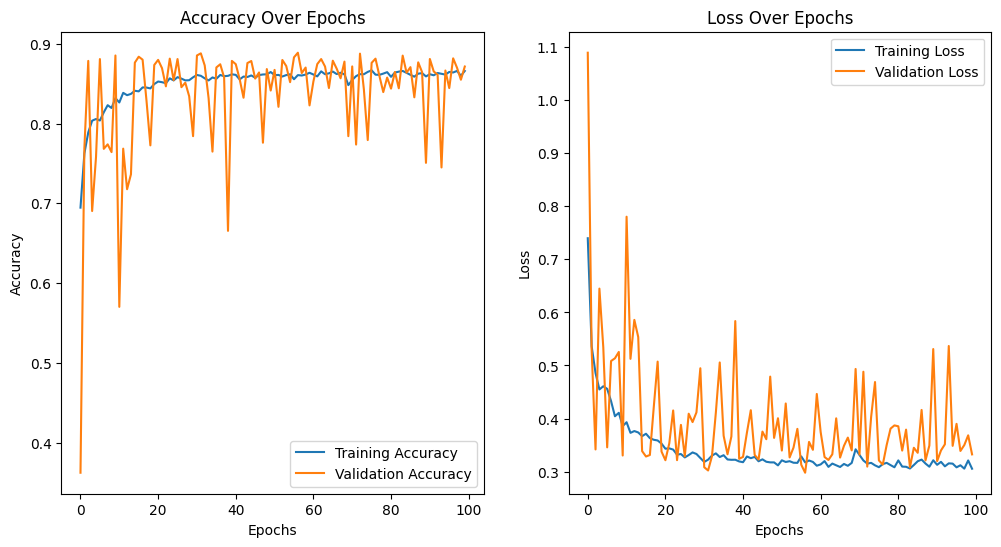

In [90]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
